# **Regresi Linear Prediksi Penjualan Ice Cream**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model

Mengupload data set

In [ ]:
dt = pd.read_csv('https://raw.githubusercontent.com/adhipramanax/Regresi-Linear-Penjualan-IceCream/main/IceCream.csv')

Menampilkan data set

In [ ]:
dt.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


Plot data set 
menggunakan scatter plot 


<function matplotlib.pyplot.show>

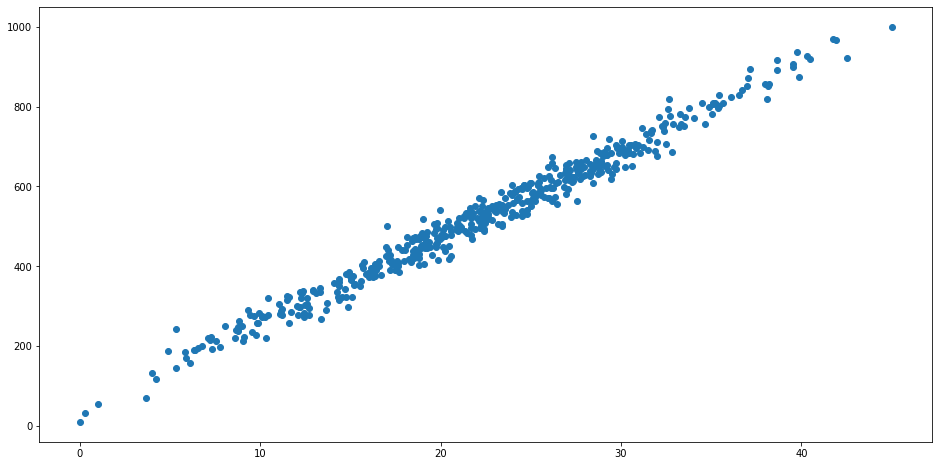

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(dt['Temperature'], dt['Revenue'])
plt.show

Normalisasi data menjadi 0-1 range

In [ ]:
  normalize = preprocessing.Normalization(axis=None, input_shape=[1,])
  normalize.adapt(np.array(dt['Temperature']))

Deklarasi model deep learning

In [ ]:
model = Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

Menampilkan model squential


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Model prediksi awal sebelum di traning

In [ ]:
model.predict(dt['Temperature'][:5])

array([[ 0.04884383],
       [ 0.07893491],
       [ 0.11628678],
       [-0.01187376],
       [-0.07782462]], dtype=float32)

Melakukan proses konfigurasi model 

In [ ]:
#fungsi
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

Proses Traning dengan 500 epochs yaitu penggulangan traning data

In [ ]:
history = model.fit(dt['Temperature'], dt['Revenue'], epochs=500, validation_split=0.2)

Epoch 1/500
13/13 [==============================] - 1s 16ms/step - loss: 513.7802 - val_loss: 551.1348
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 513.2966 - val_loss: 550.6204
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 512.6954 - val_loss: 549.8897
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 511.7791 - val_loss: 548.7492
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 510.3727 - val_loss: 547.0742
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 508.2946 - val_loss: 544.7012
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 505.3332 - val_loss: 541.3876
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 501.3091 - val_loss: 536.9003
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 496.0194 - val_loss: 531.0172
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss

Plot hasil model 

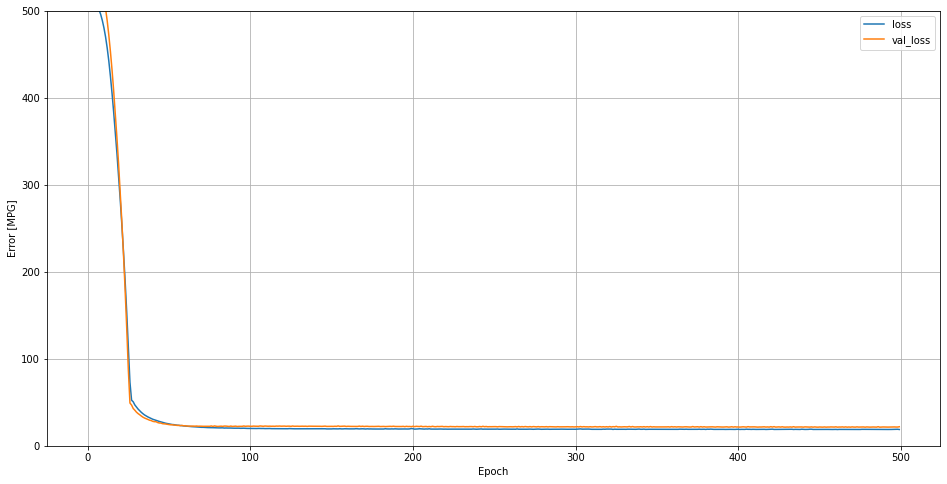

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(16, 8))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 500])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

hasil dari plot loss

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
495,18.830351,21.566496,495
496,18.816069,21.680096,496
497,18.796177,21.562883,497
498,19.013006,21.576998,498
499,18.773205,21.886292,499


Memvisualisasikan hasil regresi


In [ ]:
x = tf.linspace(0.0, 50, 51)
y = model.predict(x)

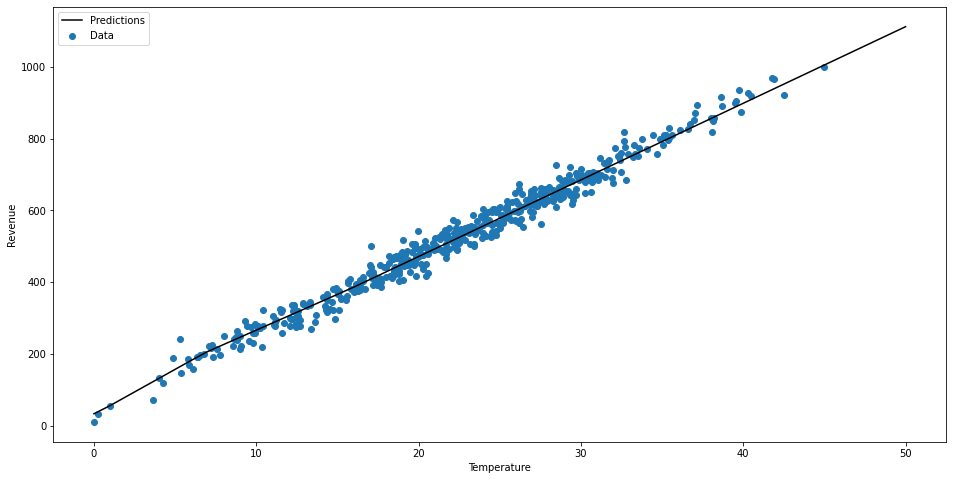

In [ ]:
def plot_show(x, y):
  plt.figure(figsize=(16, 8))
  plt.scatter(dt['Temperature'], dt['Revenue'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Temperature')
  plt.ylabel('Revenue')
  plt.legend()

plot_show(x, y)